# AI CODE

## TEAMMATES

### P SANTHOSH 21BCE1657
### S ANISH RISHI 21BCE5999
### SHIVARAM K K 21BCE6171

### DATASET OBTAINED FROM
[IDS-2017](https://www.unb.ca/cic/datasets/ids-2017.html)

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np
# Read data
data = pd.read_csv("cic2017.csv")

label_mapping = {'BENIGN': 0, 'Bot': 1, 'BruteForce': 2, 'DoS': 3, 'Infiltration': 4, 'PortScan': 5, 'WebAttack': 6}
data['Label'] = data['Label'].map(label_mapping)

# Data preprocessing
# Drop rows with infinite or large values
data = data.replace([float('inf'), float('-inf')], pd.NA)
data = data.dropna()



corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
data.drop(to_drop, axis=1, inplace=True)

# Separate features and target variable
X_ini = data.drop(columns=['Label'])
y_ini = data['Label']



ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/anishrishi/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [ ]:
label_counts = data['Label'].value_counts()

print(label_counts)

smote = SMOTE()


X, y = smote.fit_resample(X_ini, y_ini)

# Count the occurrences of each unique value in the resampled target variable
label_counts_resampled = pd.Series(y).value_counts()

print(label_counts_resampled)

Label
0    22719
3    18984
5     7938
2     2767
6     2180
1     1956
4       36
Name: count, dtype: int64
Label
0    22719
3    22719
5    22719
1    22719
4    22719
6    22719
2    22719
Name: count, dtype: int64


In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Predictions
nb_predictions = nb_model.predict(X_test_scaled)




nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='macro')
nb_recall = recall_score(y_test, nb_predictions, average='macro')
nb_f1 = f1_score(y_test, nb_predictions, average='macro')

print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)


Naive Bayes Metrics:
Accuracy: 0.7938504102870437
Precision: 0.8151772298708835
Recall: 0.7908226653112459
F1 Score: 0.7675136437190478


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predictions
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='macro')
dt_recall = recall_score(y_test, dt_predictions, average='macro')
dt_f1 = f1_score(y_test, dt_predictions, average='macro')

print("Decision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)


Decision Tree Metrics:
Accuracy: 0.99691891721948
Precision: 0.9968956228319327
Recall: 0.9968941894887525
F1 Score: 0.9968947265542288


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='macro')
rf_recall = recall_score(y_test, rf_predictions, average='macro')
rf_f1 = f1_score(y_test, rf_predictions, average='macro')

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

Random Forest Metrics:
Accuracy: 0.9975791492438771
Precision: 0.9975943490224578
Recall: 0.997539572147984
F1 Score: 0.9975625616250391


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate the model
et_model = ExtraTreesClassifier()

# Train the model
et_model.fit(X_train_scaled, y_train)

et_predictions = et_model.predict(X_test_scaled)

# Evaluate the model
et_accuracy = accuracy_score(y_test, et_predictions)
et_precision = precision_score(y_test, et_predictions, average='macro')
et_recall = recall_score(y_test, et_predictions, average='macro')
et_f1 = f1_score(y_test, et_predictions, average='macro')

print("Extra Trees Metrics:")
print("Accuracy:", et_accuracy)
print("Precision:", et_precision)
print("Recall:", et_recall)
print("F1 Score:", et_f1)

Extra Trees Metrics:
Accuracy: 0.9961958059546641
Precision: 0.9961930222683643
Recall: 0.9961392163056383
F1 Score: 0.9961601276425662


In [ ]:
from xgboost import XGBClassifier

# Instantiate the model
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='macro')
xgb_recall = recall_score(y_test, xgb_predictions, average='macro')
xgb_f1 = f1_score(y_test, xgb_predictions, average='macro')

print("XGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)


XGBoost Metrics:
Accuracy: 0.9985537774703681
Precision: 0.9985443975134406
Recall: 0.9985438549816331
F1 Score: 0.9985440772691588


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('nb', nb_model),
    ('dt', dt_model),
    ('rf', rf_model),
    ('et', et_model),
    ('xgb', xgb_model)
], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predictions
ensemble_predictions = ensemble_model.predict(X_test_scaled)

# Evaluate the model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions, average='macro')
ensemble_recall = recall_score(y_test, ensemble_predictions, average='macro')
ensemble_f1 = f1_score(y_test, ensemble_predictions, average='macro')

print("Ensemble Metrics:")
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1 Score:", ensemble_f1)


Ensemble Metrics:
Accuracy: 0.9981765020278555
Precision: 0.9981783005507728
Recall: 0.9981550631793096
F1 Score: 0.9981655159093131


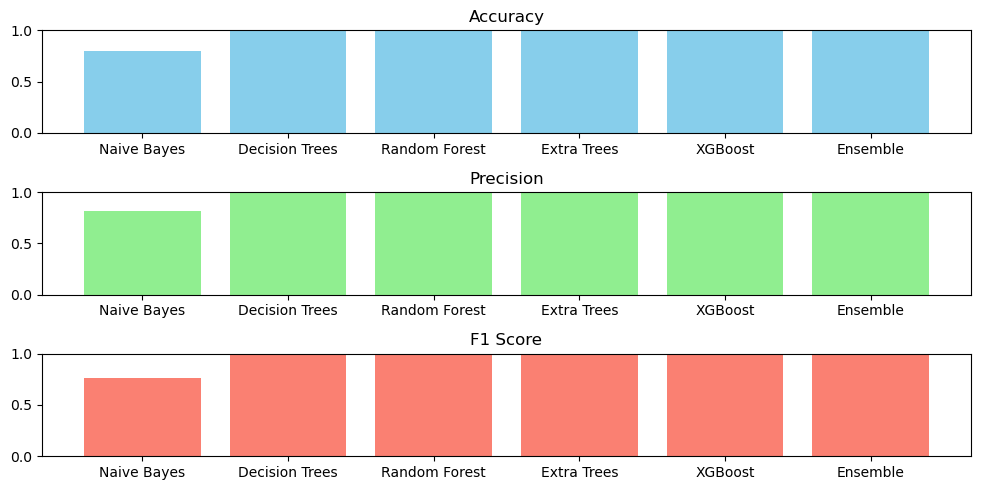

In [ ]:
import matplotlib.pyplot as plt

# Metrics data
models = ['Naive Bayes', 'Decision Trees', 'Random Forest', 'Extra Trees', 'XGBoost', 'Ensemble']
accuracies = [nb_accuracy, dt_accuracy, rf_accuracy, et_accuracy, xgb_accuracy, ensemble_accuracy]
precisions = [nb_precision, dt_precision, rf_precision, et_precision, xgb_precision, ensemble_precision]
f1_scores = [nb_f1, dt_f1, rf_f1, et_f1, xgb_f1, ensemble_f1]

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy')
plt.ylim(0, 1)

plt.subplot(3, 1, 2)
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision')
plt.ylim(0, 1)

plt.subplot(3, 1, 3)
plt.bar(models, f1_scores, color='salmon')
plt.title('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


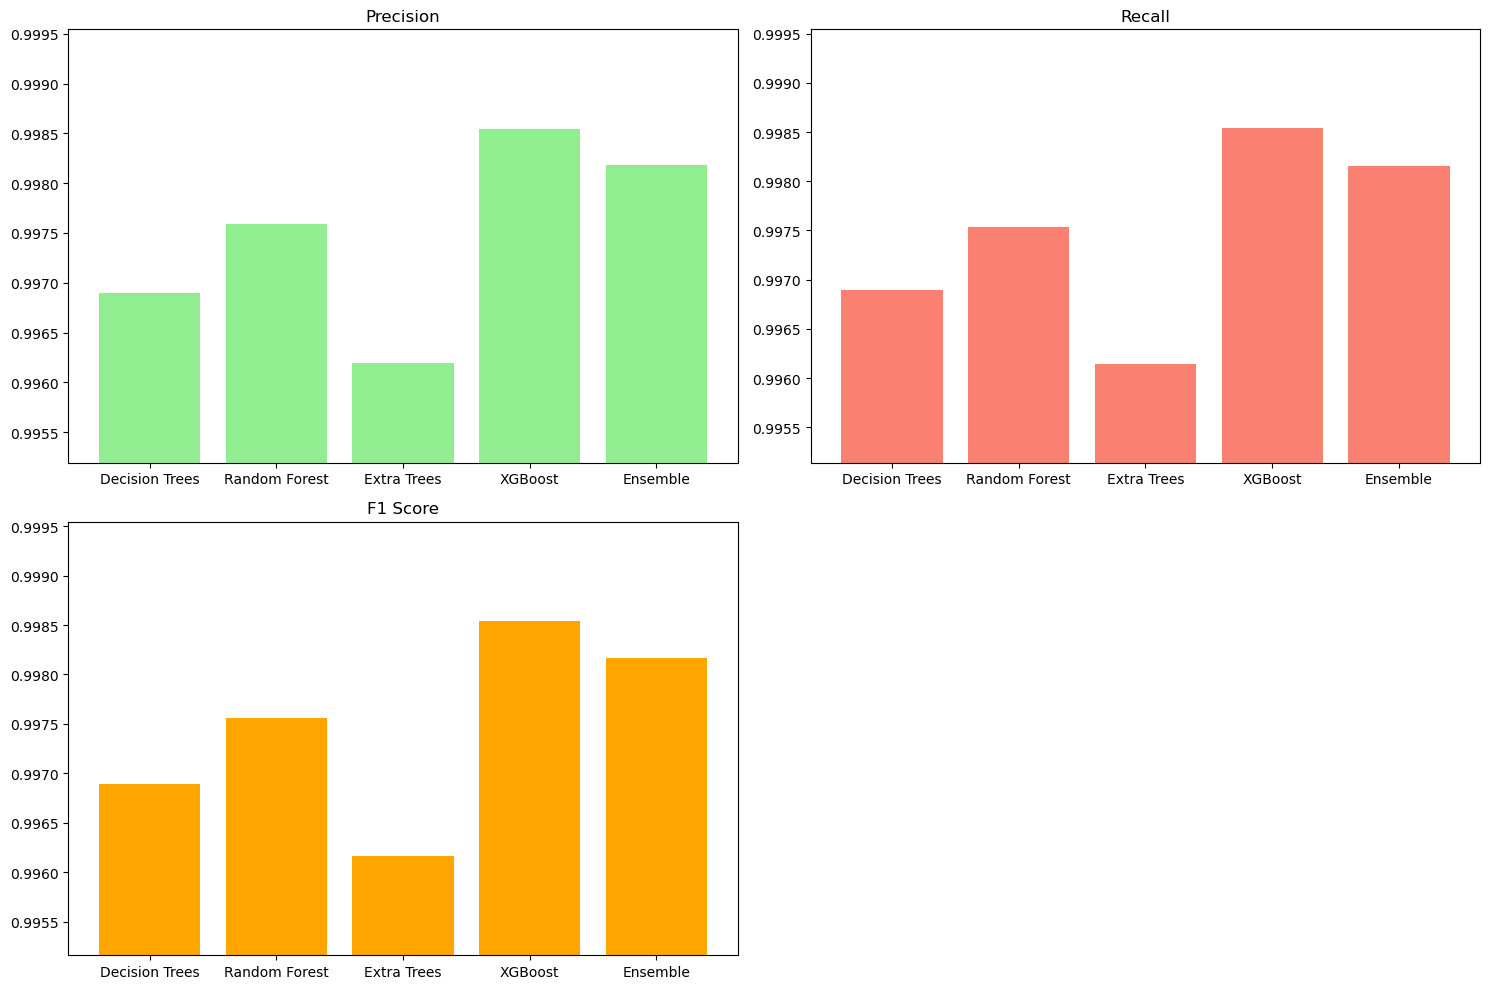

In [ ]:
import matplotlib.pyplot as plt

# Metrics data
models = ['Decision Trees', 'Random Forest', 'Extra Trees', 'XGBoost', 'Ensemble']
accuracies = [dt_accuracy, rf_accuracy, et_accuracy, xgb_accuracy, ensemble_accuracy]
precisions = [dt_precision, rf_precision, et_precision, xgb_precision, ensemble_precision]
recalls = [dt_recall, rf_recall, et_recall, xgb_recall, ensemble_recall]
f1_scores = [dt_f1, rf_f1, et_f1, xgb_f1, ensemble_f1]

# Plotting
plt.figure(figsize=(15, 10))



plt.subplot(2, 2, 1)
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision')
plt.ylim(min(precisions) - 0.001, max(precisions) + 0.001)

plt.subplot(2, 2, 2)
plt.bar(models, recalls, color='salmon')
plt.title('Recall')
plt.ylim(min(recalls) - 0.001, max(recalls) + 0.001)

plt.subplot(2, 2, 3)
plt.bar(models, f1_scores, color='orange')
plt.title('F1 Score')
plt.ylim(min(f1_scores) - 0.001, max(f1_scores) + 0.001)

plt.tight_layout()
plt.show()


### DATASET OBTAINED FROM
### https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Read the dataset
data = pd.read_csv("nid.csv")


corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
data.drop(to_drop, axis=1, inplace=True)


# Separate features and target variable
X_ini = data.drop(columns=['class']) 
y_ini = data['class']


In [ ]:
label_counts = data['class'].value_counts()

print(label_counts)



class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [ ]:
# Apply Label Encoding to categorical features
le = LabelEncoder()
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    X_ini[col] = le.fit_transform(X_ini[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ini, y_ini, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='macro')
nb_recall = recall_score(y_test, nb_predictions, average='macro')
nb_f1 = f1_score(y_test, nb_predictions, average='macro')

print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)


Naive Bayes Metrics:
Accuracy: 0.5572534232982734
Precision: 0.6725546098501707
Recall: 0.5294291912884388
F1 Score: 0.42018686760925167


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predictions
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='macro')
dt_recall = recall_score(y_test, dt_predictions, average='macro')
dt_f1 = f1_score(y_test, dt_predictions, average='macro')

print("Decision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)


Decision Tree Metrics:
Accuracy: 0.9964278626711649
Precision: 0.9963674838701517
Recall: 0.9964632408867158
F1 Score: 0.9964147275790625


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='macro')
rf_recall = recall_score(y_test, rf_predictions, average='macro')
rf_f1 = f1_score(y_test, rf_predictions, average='macro')

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Random Forest Metrics:
Accuracy: 0.9976185751141099
Precision: 0.997659249333914
Recall: 0.9975607249197899
F1 Score: 0.9976093511895838


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Train the Extra Trees classifier
et_classifier = ExtraTreesClassifier()
et_classifier.fit(X_train, y_train)

# Predictions
et_predictions = et_classifier.predict(X_test)

# Evaluate the model
et_accuracy = accuracy_score(y_test, et_predictions)
et_precision = precision_score(y_test, et_predictions, average='macro')
et_recall = recall_score(y_test, et_predictions, average='macro')
et_f1 = f1_score(y_test, et_predictions, average='macro')

print("Extra Trees Metrics:")
print("Accuracy:", et_accuracy)
print("Precision:", et_precision)
print("Recall:", et_recall)
print("F1 Score:", et_f1)


Extra Trees Metrics:
Accuracy: 0.9972216709664616
Precision: 0.9972607681647787
Recall: 0.9971623226402235
F1 Score: 0.9972109097211811


In [ ]:
from xgboost import XGBClassifier

y_train = y_train.map({'normal': 0, 'anomaly': 1})
y_test = y_test.map({'normal': 0, 'anomaly': 1})

# Train the XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='macro')
xgb_recall = recall_score(y_test, xgb_predictions, average='macro')
xgb_f1 = f1_score(y_test, xgb_predictions, average='macro')

print("XGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)


XGBoost Metrics:
Accuracy: 0.9984123834094066
Precision: 0.9984309835170639
Recall: 0.9983819601803285
F1 Score: 0.9984063127599349


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble of all classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('dt', dt_classifier),
    ('rf', rf_classifier),
    ('et', et_classifier),
    ('xgb', xgb_classifier)
], voting='hard')

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Predictions
ensemble_predictions = ensemble_classifier.predict(X_test)

# Evaluate the model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions, average='macro')
ensemble_recall = recall_score(y_test, ensemble_predictions, average='macro')
ensemble_f1 = f1_score(y_test, ensemble_predictions, average='macro')

print("Ensemble Metrics:")
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1 Score:", ensemble_f1)


Ensemble Metrics:
Accuracy: 0.9978170271879341
Precision: 0.9978974336098686
Recall: 0.9977232800074636
F1 Score: 0.9978084084223005


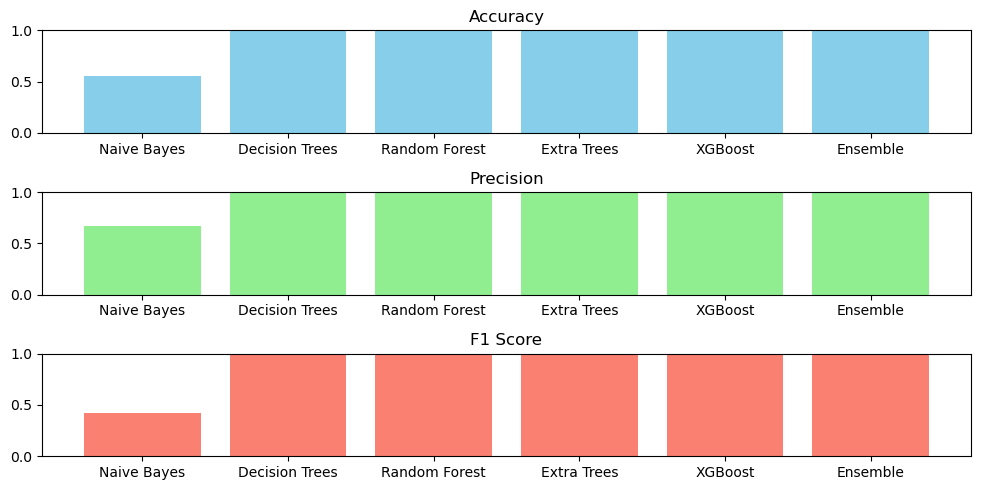

In [ ]:
import matplotlib.pyplot as plt

# Metrics data
models = ['Naive Bayes', 'Decision Trees', 'Random Forest', 'Extra Trees', 'XGBoost', 'Ensemble']
accuracies = [nb_accuracy, dt_accuracy, rf_accuracy, et_accuracy, xgb_accuracy, ensemble_accuracy]
precisions = [nb_precision, dt_precision, rf_precision, et_precision, xgb_precision, ensemble_precision]
f1_scores = [nb_f1, dt_f1, rf_f1, et_f1, xgb_f1, ensemble_f1]

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy')
plt.ylim(0, 1)

plt.subplot(3, 1, 2)
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision')
plt.ylim(0, 1)

plt.subplot(3, 1, 3)
plt.bar(models, f1_scores, color='salmon')
plt.title('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


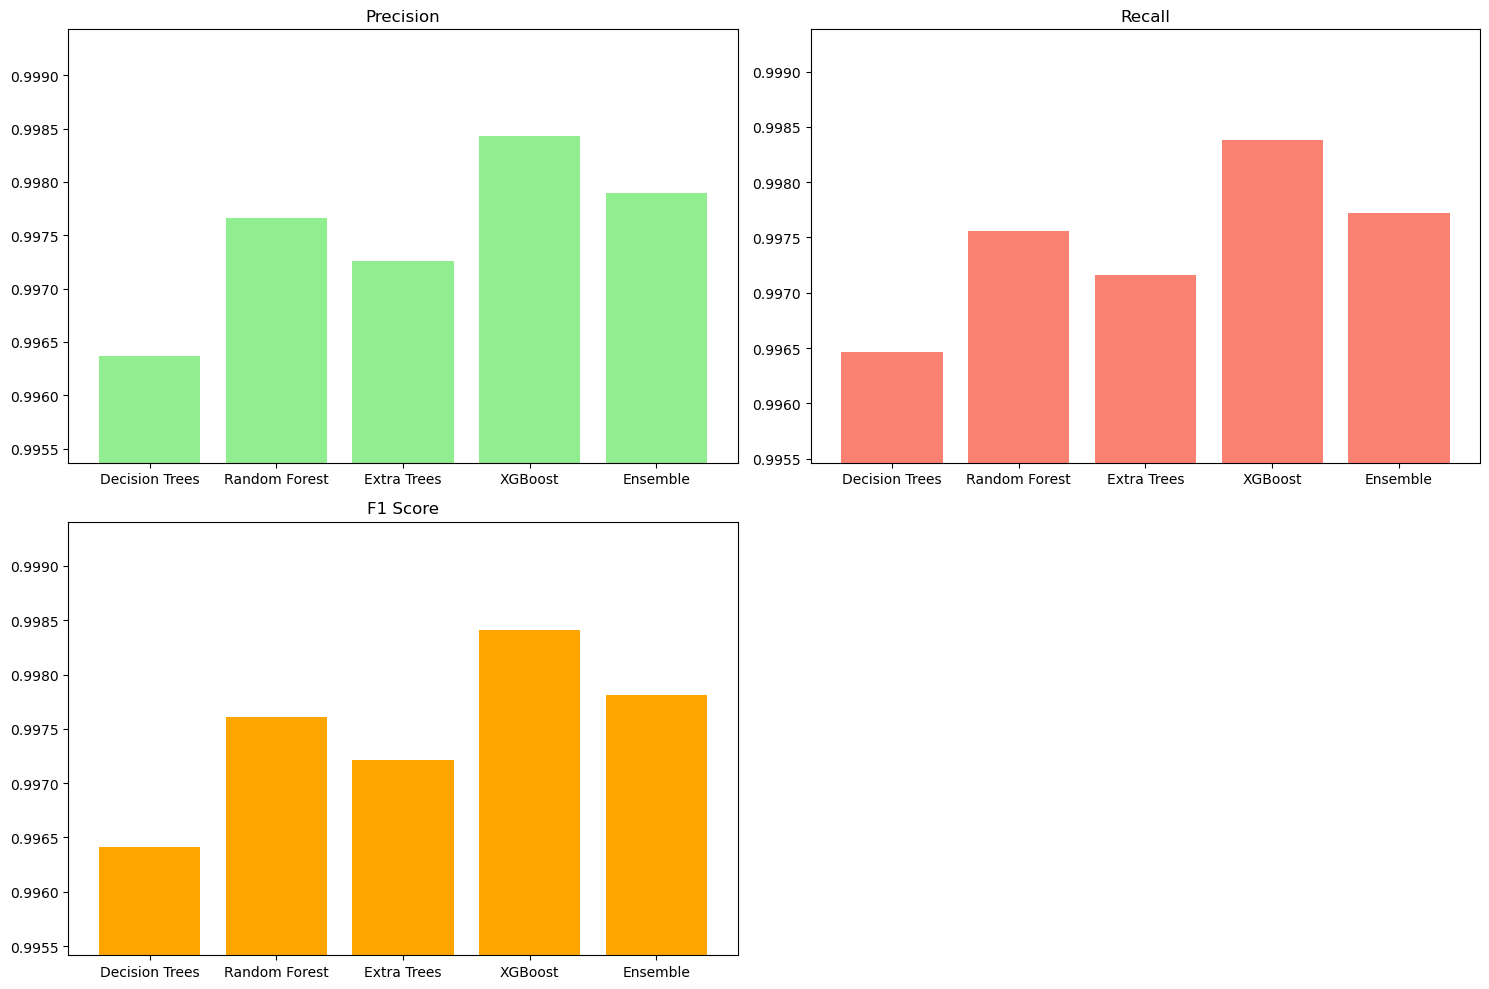

In [ ]:
import matplotlib.pyplot as plt

# Metrics data
models = ['Decision Trees', 'Random Forest', 'Extra Trees', 'XGBoost', 'Ensemble']
accuracies = [dt_accuracy, rf_accuracy, et_accuracy, xgb_accuracy, ensemble_accuracy]
precisions = [dt_precision, rf_precision, et_precision, xgb_precision, ensemble_precision]
recalls = [dt_recall, rf_recall, et_recall, xgb_recall, ensemble_recall]
f1_scores = [dt_f1, rf_f1, et_f1, xgb_f1, ensemble_f1]

# Plotting
plt.figure(figsize=(15, 10))



plt.subplot(2, 2, 1)
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision')
plt.ylim(min(precisions) - 0.001, max(precisions) + 0.001)

plt.subplot(2, 2, 2)
plt.bar(models, recalls, color='salmon')
plt.title('Recall')
plt.ylim(min(recalls) - 0.001, max(recalls) + 0.001)

plt.subplot(2, 2, 3)
plt.bar(models, f1_scores, color='orange')
plt.title('F1 Score')
plt.ylim(min(f1_scores) - 0.001, max(f1_scores) + 0.001)

plt.tight_layout()
plt.show()
